# ANALIZA FINANČNIH PODATKOV O DELNICAH

Avtorica: Anamarija Potokar

## UVOD

V svoji projektni nalogi sem raziskovala in analizirala finančne podatke o delnicah petih podjetij, da bi pridobila boljši vpogled v gibanje cen delnic, preučila trende, volatilnosti in kazalnik RSI. Za pridobitev podatkov, izvedbo analiz in vizualizacijo sem uporabljala Pythonove knjižnice *yfinance*, *pandas*, *matplotlib* in *numpy*.

## PRIDOBIVANJE IN SHRANJEVANJE PODATKOV

Najprej uvozim knjižnice, ki jih bom potrebovala:

In [1]:
import yfinance as yf
import pandas as pd

Knjižnica *yfinance* omogoča pridobivanje podatkov o delnicah iz Yahoo Finance, katere bom uporabila za namene svoje analize. Ti podatki vključujejo informacije, kot so cena ob začetku trgovalnega dne, najvišja cena, najnižja cena, cena ob koncu trgovalnega dne in obseg trgovanja.

Analizirala sem podatke o delnicah podjetij **Apple Inc.** (oznaka AAPL), **Nvidia Corporation** (oznaka NVDA), **Google LLC** (GOOGL), **The Coca-Cola Company** (oznaka KO) in **The Boeing Company** (oznaka BO) za obdobje enega leta:

In [2]:
oznake = ['AAPL', 'NVDA', 'GOOGL', 'KO', 'BA']

zacetek = '2023-08-07'
konec = '2024-08-07'

V naslednjem koraku uvozim funkciji, ki bosta pridobili podatke in jih shranili v CSV datoteko s tabelo podatkov za posamezno delnico. Zanimale me bodo cena ob začetku in koncu trgovalnega dne, najvišja in najnižja cena ter obseg trgovanja.
Prva funkcija deluje tako, da ustvari slovar, katerega ključi so imena delnic, pripadajoče vrednosti pa tabele s podatki za to delnico; odstrani dodaten stolpec, s katerim ne bom delala, ter za namen analize in vizualizacije podatkov v nadaljevanju prevede imena stolpcev. Druga funkcija shrani posamezne tabele v CSV datoteko z uporabo knjižnice os. Rezultat prikažem na primeru delnice AAPL.

In [3]:
from pridobivanje_podatkov import pridobi_podatke
podatki = pridobi_podatke(oznake, zacetek, konec)
podatki_aapl = podatki['AAPL']
print(podatki_aapl)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
           Cena ob začetku trgovalnega dne Najvišja cena Najnižja cena  \
Date                                                                     
2023-08-07                        182.1300      183.1300      177.3500   
2023-08-08                        179.6900      180.2700      177.5800   
2023-08-09                        180.8700      180.9300      177.0100   
2023-08-10                        179.4800      180.7500      177.6000   
2023-08-11                        177.3200      178.6200      176.5500   
...                                    ...           ...           ...   
2024-07-31                        221.4400      223.8200      2

## ANALIZA PODATKOV

Zopet uvozim knjižnice, ki jih bom uporabljala:

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### DNEVNI RAZPON

V prvem delu analiziram gibanje cen delnic izbranih podjetij, zato za začetek vsaki tabeli dodam stolpec 'Dnevni razpon', ki pove interval, na katerem na posamezni trgovalni dan niha cena delnice.

In [5]:
from analiza_podatkov import dnevni_razpon
podatki = dnevni_razpon(podatki)
podatki_aapl = podatki['AAPL']
print(podatki_aapl)


           Cena ob začetku trgovalnega dne Najvišja cena Najnižja cena  \
Date                                                                     
2023-08-07                        182.1300      183.1300      177.3500   
2023-08-08                        179.6900      180.2700      177.5800   
2023-08-09                        180.8700      180.9300      177.0100   
2023-08-10                        179.4800      180.7500      177.6000   
2023-08-11                        177.3200      178.6200      176.5500   
...                                    ...           ...           ...   
2024-07-31                        221.4400      223.8200      220.6300   
2024-08-01                        224.3700      224.4800      217.0200   
2024-08-02                        219.1500      225.6000      217.7100   
2024-08-05                        199.0900      213.5000      196.0000   
2024-08-06                        205.3000      209.9900      201.0700   

           Cena ob koncu trgovalnega 

### POVPREČJE CEN

Dodam funkcijo, ki izračuna povprečno poljubno ceno, pogledam si primer povprečne cene ob koncu trgovalnega dne: 

In [6]:
from analiza_podatkov import izracun_povprecja
povprecje = izracun_povprecja(podatki, 'Cena ob koncu trgovalnega dne')
povprecje_aapl = povprecje['AAPL']
print(povprecje_aapl)

187.3496


Povprečna cena delnice je pomemben kazalnik, ki vlagateljem pomaga razumeti dolgoročne trende na trgu, saj izloča kratkoročna nihanja in poudarja splošni trend.

### MOČ TRENDA

Naslednji korak je izračun moči trenda na posamezni trgovalni dan, ta podatek dodam v tabelo:

In [7]:
from analiza_podatkov import preveri_moc_trenda
moc_trenda = preveri_moc_trenda(podatki)
moc_trenda_aapl = moc_trenda['AAPL']
print(moc_trenda_aapl)

           Cena ob začetku trgovalnega dne Najvišja cena Najnižja cena  \
Date                                                                     
2023-08-07                        182.1300      183.1300      177.3500   
2023-08-08                        179.6900      180.2700      177.5800   
2023-08-09                        180.8700      180.9300      177.0100   
2023-08-10                        179.4800      180.7500      177.6000   
2023-08-11                        177.3200      178.6200      176.5500   
...                                    ...           ...           ...   
2024-07-31                        221.4400      223.8200      220.6300   
2024-08-01                        224.3700      224.4800      217.0200   
2024-08-02                        219.1500      225.6000      217.7100   
2024-08-05                        199.0900      213.5000      196.0000   
2024-08-06                        205.3000      209.9900      201.0700   

           Cena ob koncu trgovalnega 

Moč trenda se izračuna s pomočjo združevanja informacij o spremembi cene in obsegu trgovanja (volumna). Moja funkcija izračuna dnevno spremembo cene in obsega trgovanja, nato pa primerja ti spremembi: če se cena in volumen premikata v isti smeri, to kaže na močan trend, kar pomeni, da obstaja široka podpora med vlagatelji za to gibanje; v nasprotnem primeru pa gre za šibkejši ali manj stabilen trend, kar pomeni, da je možno, da je trend začasen, saj ni podprt s spremembo trgovanja.

### VIZUALIZACIJA GIBANJA CEN

Za izbranih 5 podetij si pogledam gibanje cen njihovih delnic na izbranem časovnem intervalu enega leta; to storim za primer cene ob koncu trgovalnega dne:

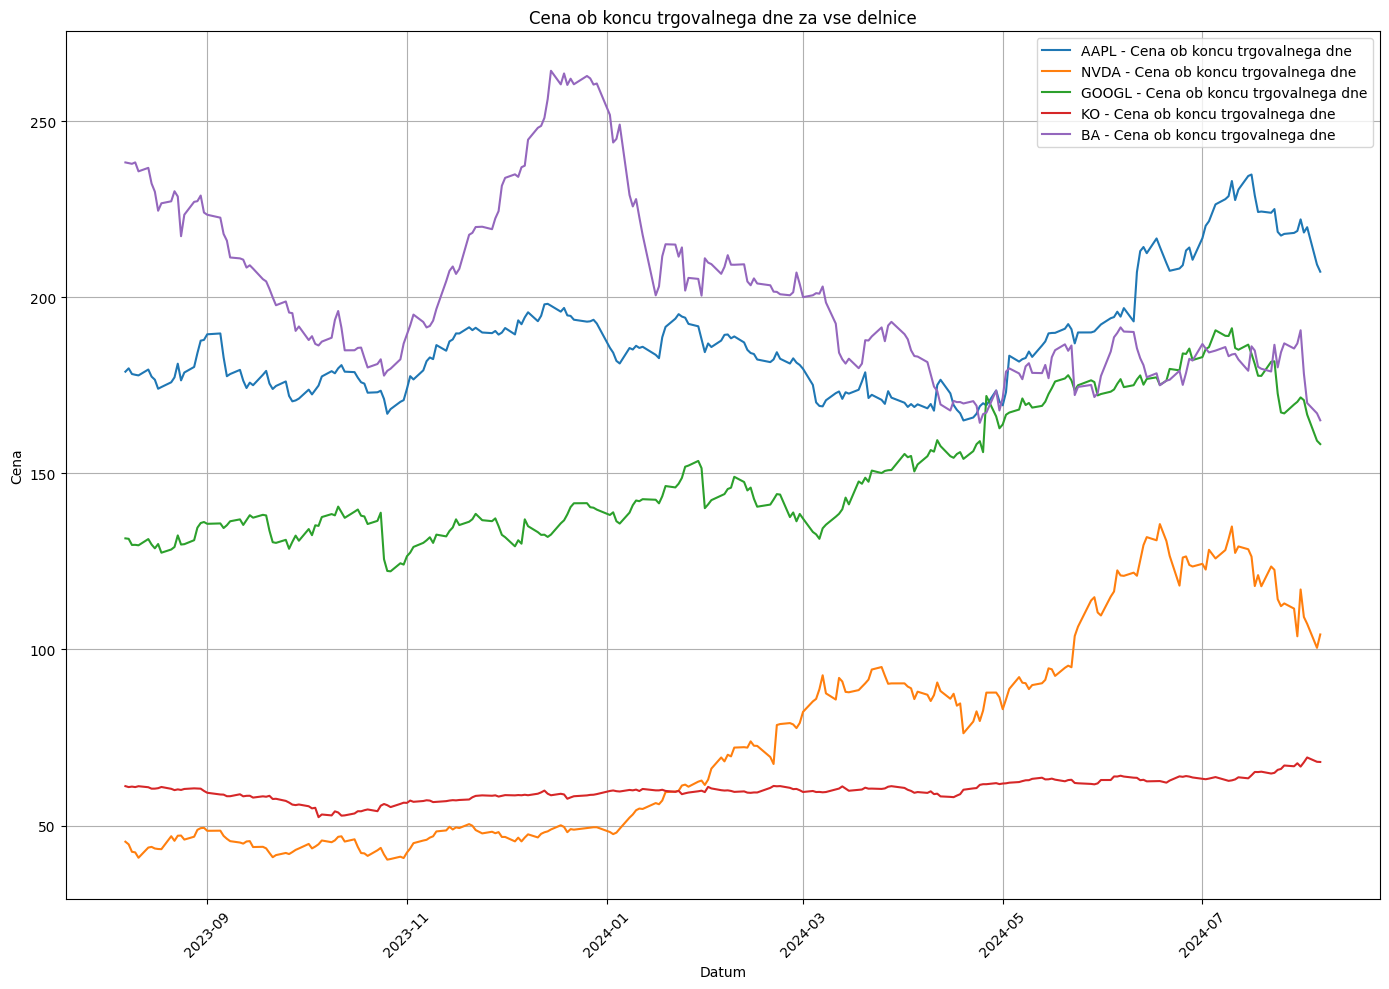

In [8]:
from analiza_podatkov import graf_cene
graf_cene(podatki, 'Cena ob koncu trgovalnega dne')

Na grafu opazim, da ima za preučevano obdobje graf cene delnice podjetja Coca Cola najmanj vzponov in padcev ter so le-ti minimalni, medtem ko za cene delnic preostalih podjetij to ne drži. To nakazuje na najmanjšo volatilnost delnice podjetja Coca Cola, zdi se, da je najbolj volatilna delnica podjetja Nvidia. Za potrditev svoje hipoteze uporabim funkcijo za izračun volatilnosti posamezne delnice in narišem njihove grafe.

### VOLATILNOST

Ker so investitorji nenagnjeni k tveganju, je cilj ugotoviti, kako volatilne so delnice posameznih podjetij, torej koliko se njihov dnevnih donos giblje okoli svojega povprečja, kar odraža variabilnost cene.

In [9]:
from analiza_podatkov import izracun_volatilnosti
volatilnost = izracun_volatilnosti(podatki)

Volatilnost delnice AAPL za obravnavano obdobje je: 0.0143
Volatilnost delnice NVDA za obravnavano obdobje je: 0.0313
Volatilnost delnice GOOGL za obravnavano obdobje je: 0.0175
Volatilnost delnice KO za obravnavano obdobje je: 0.0084
Volatilnost delnice BA za obravnavano obdobje je: 0.0197


Kot pričakovano je najmanj volatilna delnica podjetja Coca Cola (0.84%), najbolj volatilna pa delnica podjetja Nvidia (3.13%). 
V splošnem stopnjo nihanja razdelimo v 3 skupine: **nizka volatilnost(manjša od 1%)** kaže na stabilnost podjetja in lahko pomeni manjše tveganje, a tudi manjše priložnosti za visoke donose; **srednja volatilnost(1% do 3%)** je znak zmerne nestabilnosti, pri kateri se lahko pojavijo zmerni dobički ali izgube; **visoka volatilnost( večja od 3%)** pa pomeni, da se cena delnice močno spreminja, kar pomeni večje tveganje, a tudi potencial za večje donose.
V mojem naboru delnic je torej KO nizko volatilna, NVDA visoko volatilna, preostale pa srednje volatilne. To je tudi v skladu z dejstvom, da imajo delnice tehnoloških podjetij (NVDA) običajno višjo volatilnost kot stabilne potrošniške dobrine.

Narišem še graf, iz katerega lahko razberem volatilnosti:

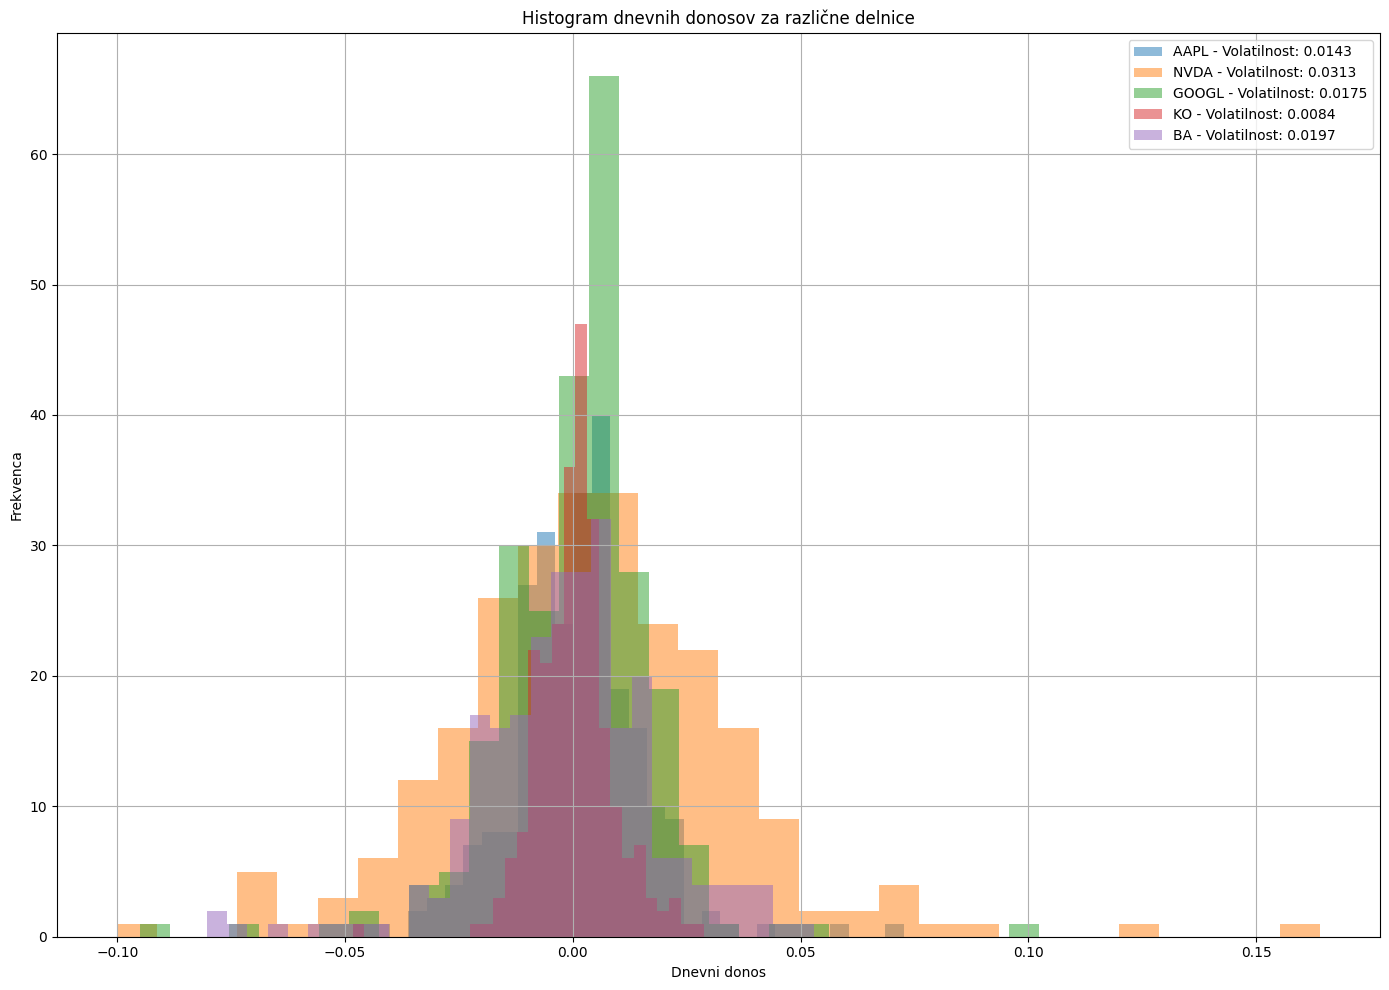

In [10]:
from analiza_podatkov import graf_histogram_volatilnosti
graf_histogram_volatilnosti(podatki)

Histogram prikazuje, kako so razporejeni dnevni donosi posamezne delnice. Volatilnost je povezana z razpršenostjo donosov: tam, kjer histogram prikazuje širšo porazdelitev z večjo frekvenco v širših intervalih, je volatilnost višja, medtem ko ožja porazdelitev pomeni nižjo volatilnost.

### INDEKS RELATIVNE MOČI (RSI)

Indeks relativne moči je kazalnik, ki meri hitrost in spremembo gibanja cene in se uporablja za oceno prekupljenosti oziroma podkupljenosti finančnega instrumenta na posamezen dan. Računamo ga za določeno obdobje, najpogosteje 14 dni, ki je tudi privzeta vrednost v vseh nadaljnjih funkcijah. to obdobje določa, koliko zadnjih dni se upošteva pri izračunu povprečnih dobičkov in izgub, ki so ključnega pomena za izračun RSI.

In [11]:
from analiza_podatkov import izracunaj_RSI
rsi_vseh = izracunaj_RSI(podatki)
rsi_aapl = rsi_vseh['AAPL']
print(rsi_aapl)

           Cena ob začetku trgovalnega dne Najvišja cena Najnižja cena  \
Date                                                                     
2023-08-07                        182.1300      183.1300      177.3500   
2023-08-08                        179.6900      180.2700      177.5800   
2023-08-09                        180.8700      180.9300      177.0100   
2023-08-10                        179.4800      180.7500      177.6000   
2023-08-11                        177.3200      178.6200      176.5500   
...                                    ...           ...           ...   
2024-07-31                        221.4400      223.8200      220.6300   
2024-08-01                        224.3700      224.4800      217.0200   
2024-08-02                        219.1500      225.6000      217.7100   
2024-08-05                        199.0900      213.5000      196.0000   
2024-08-06                        205.3000      209.9900      201.0700   

            Cena ob koncu trgovalnega

RSI izračunamo po formuli **RSI = 100 - 100/(1 + RS)**, kjer je RS relativna moč in je razmerje med povprečnimi pozitivnimi in negativnimi spremembami cen v določenem obdobju (najpogosteje 14 dni, jaz pa sem funkcijo prilagodila, ker bi sicer prvih 13 in zadnjih 13 dni bilo brez podatka za RSI). 
RSI je število med 0 in 100; če je RSI >70, je delnica prekupljena (kar bi lahko nakazovalo, da je čas za prodajo, saj se cena morda pripravlja na padec), če je <30, je podkupljena (kar bi lahko nakazovalo, da je čas za nakup, saj se cena morda pripravlja na dvig), če pa je med 30 in 70, pa je nevtralna.

Sedaj še grafično prikažem RSI za delnico AAPL:

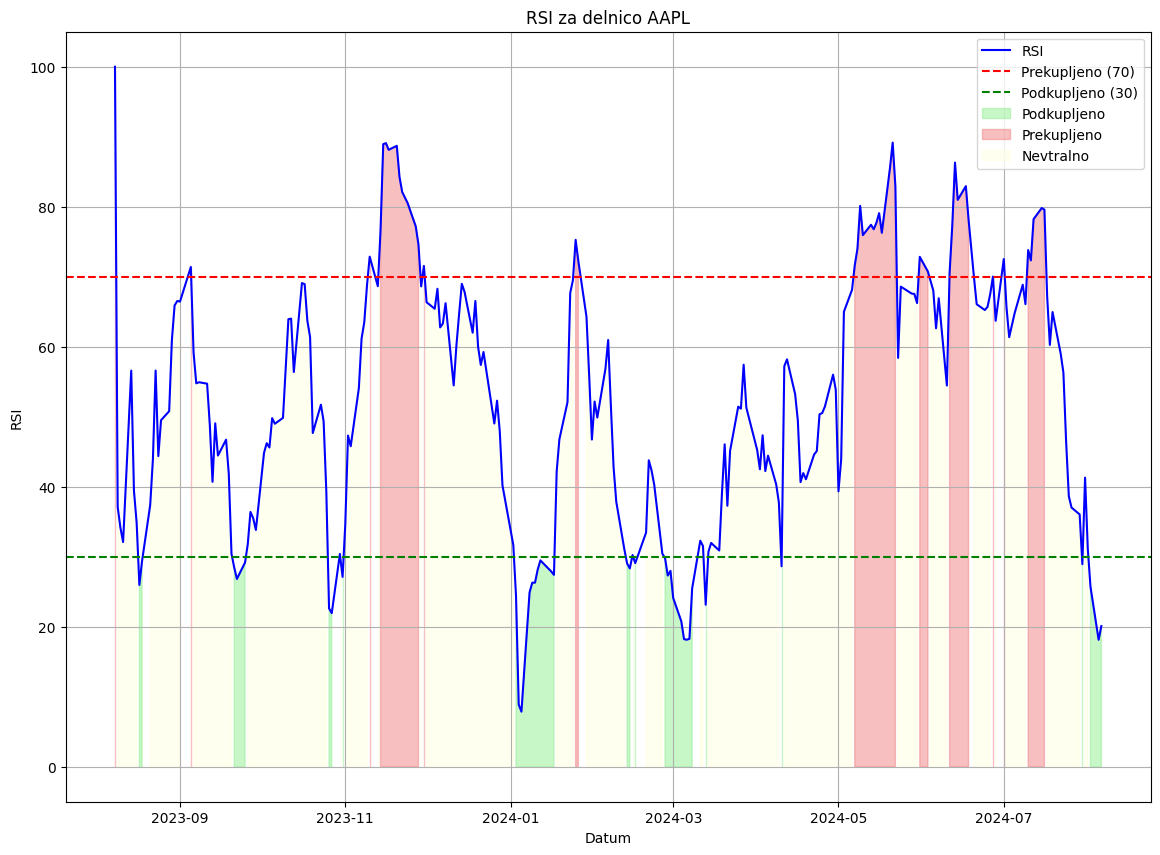

In [12]:
from analiza_podatkov import graf_RSI
graf_RSI('AAPL', podatki)

V opazovanem obdobju je bila delnica AAPL večino časa nevtralna, kar pomeni, da večinoma čas za pretirano trgovanje na podlagi tega kazalnika ni bil idealen. Za prvih 13 in zadnih 13 dni preučevanega obdobja graf nima vrednosti, saj takrat nimamo dovolj podatkov. Če bi želeli RSI izračunati tudi za manjkajoče dni, bi lahko za obdobje vzeli manj dni, vendar bi bil potem morda preobčutljiv na kratkoročne spremembe cen, kar bi lahko povzročilo več lažnih signalov za nakup ali prodajo.

### STRATEGIJA TRGOVANJA

Kot že omenjeno glede na kazalnik RSI investitor lahko razbere, ali je primeren čas za prodajo, nakup ali pa nič od tega za izbrano delnico. Za začetek napišem funkciji za nakup oziroma prodajo delnic, pri čemer predpostavljam, da je investitor racionalen:

In [13]:
from analiza_podatkov import kupi_delnice
from analiza_podatkov import prodaj_delnice

Sedaj uvozim funkcijo, ki avtomatizira trgovanje z izbrano delnico, s privzetima vrednostima za obdobje (14 dni) in začetne finance, s katerimi razpolagamo (10000 enot):

In [14]:
from analiza_podatkov import avtomatizirano_trgovanje
avtomatizirano_trgovanje('AAPL', podatki)

2023-08-07: Neukrepanje za delnico AAPL pri ceni 178.85 z RSI nan
2023-08-09: Neukrepanje za delnico AAPL pri ceni 178.19 z RSI 37.11
2023-08-10: Neukrepanje za delnico AAPL pri ceni 177.97 z RSI 34.17
2023-08-11: Neukrepanje za delnico AAPL pri ceni 177.79 z RSI 32.09
2023-08-14: Neukrepanje za delnico AAPL pri ceni 179.46 z RSI 56.59
2023-08-15: Neukrepanje za delnico AAPL pri ceni 177.45 z RSI 39.46
2023-08-16: Neukrepanje za delnico AAPL pri ceni 176.57 z RSI 34.84
2023-08-17: Kupil 57 delnic AAPL pri ceni 174.00
2023-08-21: Neukrepanje za delnico AAPL pri ceni 175.84 z RSI 37.38
2023-08-22: Neukrepanje za delnico AAPL pri ceni 177.23 z RSI 43.92
2023-08-23: Neukrepanje za delnico AAPL pri ceni 181.12 z RSI 56.60
2023-08-24: Neukrepanje za delnico AAPL pri ceni 176.38 z RSI 44.37
2023-08-25: Neukrepanje za delnico AAPL pri ceni 178.61 z RSI 49.50
2023-08-28: Neukrepanje za delnico AAPL pri ceni 180.19 z RSI 50.79
2023-08-29: Neukrepanje za delnico AAPL pri ceni 184.12 z RSI 60.93
2

S to funkcijo simuliram preprost sistem avtomatiziranega trgovanja z uporabo kazalnika RSI. Za vsak dan časovnega intervala pove, ali je čas za nakup, prodajo ali pa nič od tega. Na koncu funkcija izpiše končno stanje na našem računu, število delnic izbranega podjetja, ki jih imamo v lasti, ter vrednost našega portfelja.